# CS 536 : Perceptrons and SVMs

## Part 1: Perceptrons

#### 1. For k = 5, ε = 0.1, for a range of possible m values, repeatedly generate data sets of size m and fit a perceptron to them. Plot, as a function of m, the average number of steps needed for the Perceptron Learning Algorithm to converge. Do your results make sense? Do you think looking at larger and larger m values outside the range you plot will produce anything different?

I have written a function generateX(k,m,e) to generate a vector $\bar{X}$ with k dimensions, a total of m data points and e as ε value. perceptronValidation(X,w,b) function is used to verify if given weights and bias seperate the data linearly correct or not; if not then it returns the index + 1 of the incorrectly classified data. perceptronFit(X) finds the perfect weights and bias that seperate the data linearly correct; and returns the no.of steps needed for the Perceptron Learning Algorithm to converge.

In [8]:
# Importing neccessary packages
import numpy as np
from numpy.linalg import norm
import pandas as pd
import matplotlib.pyplot as plt
import math
import pprint

In [3]:
def generateX(k, m, e): #k is the no. of dimensions of the vector, m is no. of data points in total and e as epsilon
    # Generating X vector
    mu, sigma = 0, 1 # mean and standard deviation given in the data schema
    
    X = [] #Initializing X vector as null
    while len(X) < m: # m/k gives us no. of Z vectors to be generated
        Z = np.random.normal(mu, sigma, k) # Generating a normal distribution vector with mean mu and variance sigma.
        Z = Z/norm(Z) # since each x = Z/||Z||; norm() function gives us Euclidean norm of the vector.
        if (abs(Z[k-1]) >= e): # Only when absolute value of x.k is greater than or equal to ε we consider the vector else we discard it.
            X.append(Z)
    
    Y=[]  # Initializing Y vector as null
    for i in range(len(X)): # for each vector in X
        if(X[i][k-1] >= e): # if Xk ≥ ε the Y value is 1
            Y.append(1)
        elif(X[i][k-1] <= -e):# if Xk  ≤ - ε the Y value is -1
            Y.append(-1)
    Y = np.array([Y]).T # transposing the Y values to append to X vector
    # Merging X and Y values to a single dataframe for returning the final X-vector.
    X_vector = pd.DataFrame(np.append(X, Y, axis=1)) 
    
    return(X_vector)
        
    

In [4]:
def perceptronValidation(X,w,b):
    # find out the estimated y value of the X vector using the formula given in the schema.
    for i in range(len(X)): # for each vector in X
        f_x = 0 # Initialise f(x) value as 0
        for j in range(len(X.columns)-1):
            f_x += w[j]*X[j][i]
        est_Y = 1 if (f_x + b) >= 0 else -1
        if est_Y != X[len(X.columns)-1][i]:
            return(i+1)
    return(0)
    
def perceptronFit(X):
    #Intialize weight vector and b to null to start the classification.
    w = [0 for i in range(len(X.columns)-1)]
    b, j = 0, 0
    while(1):
        i = perceptronValidation(X,w,b)
        if(i != 0):
            for a in range(len(X.columns)-1):
                w[a] += X[a][i-1] * X[len(X.columns)-1][i-1]
            b += X[len(X.columns)-1][i-1]
            j += 1
        else:
            return(j)
    



In [165]:
X = generateX(150,450,0.1)
steps_for_fit = perceptronFit(X)
print(steps_for_fit)


68


In [6]:
def m_value_dependency(k,e):
    m = list(range(20,1000,20))
    steps = []
    for i in range(20,1000,20):
        s = 0
        for j in range(0,10):
            X = generateX(k,i,e)
            s += perceptronFit(X)
        steps.append(s/10)
    plt.plot(m, steps, marker='', color='green', linewidth=3, label="Avg. steps needed for fit as a function of no.of samples")
    plt.xlabel("No. of data points")
    plt.ylabel("Avg. steps needed for convergence")
    plt.title("Perceptron Learning Algorithm convergence w.r.t. input size")
    plt.legend()
    plt.show()

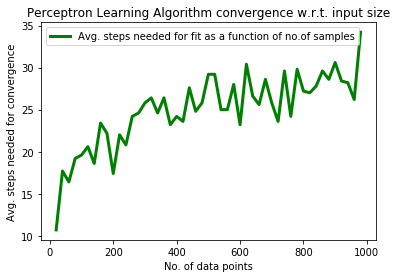

In [9]:
m_value_dependency(5,0.1)

From the above graph we can say that the average number of steps needed for convergence in Perceptron Learning Algorithm convergence is independent of sample size i.e., no.of data points in the sample. Even larger and larger m values have unpredictable behaviour.

#### 2. For m = 100, ε = 0.05, for a range of possible k values, repeatedly generate data sets of dimension k, and fit a perceptron to them. Plot, as a function of k, the average number of steps needed for the Perceptron Learning Algorithm to converge. Do your results make sense? Do you think looking at larger and larger k values outside the range you plot will produce anything different?

In [168]:
def k_value_dependency(m,e):
    k = list(range(5,150,10))
    steps = []
    for i in range(5,150,10):
        s = 0
        for j in range(0,10):
            X = generateX(i,m,e)
            s += perceptronFit(X)
        steps.append(s/10)
    plt.plot(k, steps, marker='', color='green', linewidth=3, label="Avg. steps needed for fit as a function of no.of dimensions")
    plt.xlabel("No. of dimensions")
    plt.ylabel("Avg. steps needed for convergence")
    plt.title("Perceptron Learning Algorithm convergence w.r.t. dimensions")
    plt.legend()
    plt.show()

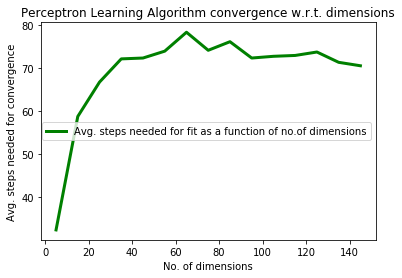

In [169]:
k_value_dependency(100,0.05)

From the above graph we can say that the average number of steps needed for convergence in Perceptron Learning Algorithm convergence is independent of dimensionality i.e., no.of dimensions in the sample. For larger and larger k values the behaviour of function is unpredictable.

#### 3. For k = 5, m = 100, for a range of possible ε values in [0, 1], repeatedly generate data sets with an ε-threshold cutoff and fit a perceptron to them. Plot, as a function of ε, the average number of steps needed for the Perceptron Learning Algorithm to converge. Do your results make sense? Do you think looking at different k, m values will produce anything different? 

In [170]:
def e_value_dependency(k,m):
    e = list(np.arange(0.05,1,0.05))
    steps = []
    for i in np.arange(0.05,1,0.05):
        s = 0
        for j in range(0,10):
            X = generateX(k,m,i)
            s += perceptronFit(X)
        steps.append(s/10)
    plt.plot(e, steps, marker='', color='green', linewidth=3, label="Steps needed for fit as a function of margin of 2 classes")
    plt.xlabel("Margin between the two data classes")
    plt.ylabel("steps needed for convergence")
    plt.title("Perceptron Learning Algorithm convergence w.r.t. margin of 2 classes")
    plt.legend()
    plt.show()

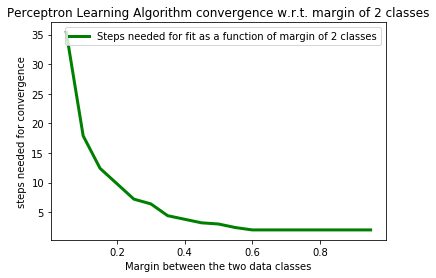

In [171]:
e_value_dependency(5,100)

We can see that after around ε ~ 0.6, no. of steps needed for convergence in the Perceptron Learning Algorithm has stabilizes which means that the convergence is heavily dependent on ε value (i.e., margin between the two data classes).

## Part 2: SVMs

#### 1. Suppose you had a data set in two dimensions that satisfied the following: the positive class all lay within a certain radius of a point, the negative class all lay outside that radius.
#### – Show that under the feature map φ($x_1$, $x_2$) = (1, $x_1$, $x_2$, $x_1$$x_2$, $x_1^2$, $x_2^2$) (or equivalently, with the kernel K($\bar{x}$, $\bar{y}$) = $(1 + \bar{x}.\bar{y})^2$), a linear separator can always be found in this embedded space, regardless of radius and where the data is centered.
#### – In fact show that if there is an ellipsoidal separator, regardless of center, width, orientation (and dimension!), a separator can be found in the quadratic feature space using this kernel.